In [1]:
import unicodecsv
import pandas as pd
#read data from CSV file and make it to lists
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
    
        return list(reader)
    
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [2]:
data_all = pd.read_csv('../../../2_data/explored/customer.csv')
customer_all=data_all['CUSTOMER_ID']
df_customer =pd.DataFrame(customer_all)
df_customer[:5]

,CUSTOMER_ID
0,2083
1,2102
2,2223
3,2224
4,2284


In [3]:

order_item = pd.read_csv('../../../2_data/explored/order_item.csv')
order = pd.read_csv('../../../2_data/explored/order.csv')
order_succsess =pd.read_csv('../../../2_data/prepared/order_success.csv')
product = pd.read_csv('../../../2_data/explored/product.csv')



goods = product['MATNR']
code=product['MAKTX']
df_goods =pd.DataFrame(goods)
df_code=pd.DataFrame(code)

df_product = pd.concat([df_goods,df_code], axis=1)
merge_id=pd.merge(order_succsess,order_item, on='ORDER_ID')
merge_product=pd.merge(product,merge_id, on='MATNR')



id_cus = merge_product['CUSTOMER_ID']
q=merge_product['QUANTITY']
matnr =merge_product['MATNR']
product_name = merge_product['MAKTX']



#oreder  success




# sum quantity

In [4]:
df2 = pd.concat([id_cus,matnr,q,product_name], axis=1, join='outer')


In [5]:
sum_df1 = df2.groupby(['CUSTOMER_ID','MATNR','MAKTX'])['QUANTITY'].sum().reset_index()
sum_df1.head()


,CUSTOMER_ID,MATNR,MAKTX,QUANTITY
0,21,25017251,SBDS ภาพแขวน #XC55153/XC,2
1,1042,25014525,SBDS เทียนตกแต่ง #5018N/YK,1
2,2082,19086644,MELONA/ตู้ผ้าWV137/DM01/D05LR/ขาว,1
3,2082,19086651,MELONA/โต๊ะทำงานDK120/ขาว,1
4,2082,19113824,BENTE/ตู้เก็บของC60/โซลิด/เดนิม-เทาดำ,1


# remove duplicate

In [6]:
df_id_remove = pd.DataFrame(sum_df1['CUSTOMER_ID'])

no_dup_id = df_id_remove.drop_duplicates(subset=['CUSTOMER_ID'])
no_dup_id[:5]

,CUSTOMER_ID
0,21
1,1042
2,2082
13,2391
14,2463


# setup index

In [7]:
no_dup_id = no_dup_id.reset_index()
no_dup_id['NEW_ID'] = no_dup_id.index + 1
df_new_id = pd.DataFrame(no_dup_id['NEW_ID']) 
df_new_id[:5]

,NEW_ID
0,1
1,2
2,3
3,4
4,5


In [8]:
add_new_id = pd.concat([no_dup_id], axis=1, join='outer')

In [9]:
add_new_id[:5]
del add_new_id['index']


In [10]:
add_new_id[:5]

,CUSTOMER_ID,NEW_ID
0,21,1
1,1042,2
2,2082,3
3,2391,4
4,2463,5


In [11]:
merge_sum_quan = pd.merge(add_new_id,sum_df1,how = 'left' , left_on =['CUSTOMER_ID'], right_on = ['CUSTOMER_ID'])
merge_sum_quan[:5]


,CUSTOMER_ID,NEW_ID,MATNR,MAKTX,QUANTITY
0,21,1,25017251,SBDS ภาพแขวน #XC55153/XC,2
1,1042,2,25014525,SBDS เทียนตกแต่ง #5018N/YK,1
2,2082,3,19086644,MELONA/ตู้ผ้าWV137/DM01/D05LR/ขาว,1
3,2082,3,19086651,MELONA/โต๊ะทำงานDK120/ขาว,1
4,2082,3,19113824,BENTE/ตู้เก็บของC60/โซลิด/เดนิม-เทาดำ,1


# new table

In [12]:
customer_id = merge_sum_quan['NEW_ID']
customer_id_old =merge_sum_quan['CUSTOMER_ID']
matnr1 =merge_sum_quan['MATNR']
quan = merge_sum_quan['QUANTITY']
sum_df2 = pd.concat([customer_id_old,customer_id,matnr1,quan], axis=1, join='outer')
sum_df2[:5]


,CUSTOMER_ID,NEW_ID,MATNR,QUANTITY
0,21,1,25017251,2
1,1042,2,25014525,1
2,2082,3,19086644,1
3,2082,3,19086651,1
4,2082,3,19113824,1


# change matnr to string

In [13]:
str_matnr =sum_df2['MATNR'].apply(str)

In [14]:
sum_df = pd.concat([customer_id_old,customer_id,str_matnr,quan], axis=1, join='outer')

In [15]:
sum_df[:5]

,CUSTOMER_ID,NEW_ID,MATNR,QUANTITY
0,21,1,25017251,2
1,1042,2,25014525,1
2,2082,3,19086644,1
3,2082,3,19086651,1
4,2082,3,19113824,1


In [16]:
sum_df['CUSTOMER_ID'] = sum_df['CUSTOMER_ID'].astype(int).astype(str)


In [17]:
sum_df.dtypes

CUSTOMER_ID    object
NEW_ID          int64
MATNR          object
QUANTITY        int64
dtype: object

In [18]:
np.unique(sum_df['QUANTITY'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 18, 24, 39])

# dataframe of goods

In [19]:
matnr2 = df2['MATNR']
maktx= df2['MAKTX']
df_goods = pd.concat([matnr2,maktx], axis=1, join='outer')
df_goods[:5]

,MATNR,MAKTX
0,19047936,PATISIA/ตู้ข้างเตียงNT45/ขาว
1,19047936,PATISIA/ตู้ข้างเตียงNT45/ขาว
2,19047936,PATISIA/ตู้ข้างเตียงNT45/ขาว
3,19047936,PATISIA/ตู้ข้างเตียงNT45/ขาว
4,19047936,PATISIA/ตู้ข้างเตียงNT45/ขาว


# pivot table 
(โดยให้ customer_id เป็นแถว และรหัสของสินค้าเป็น columns)

In [20]:
pivot = sum_df.pivot_table(index='CUSTOMER_ID', columns='MATNR', values='QUANTITY', aggfunc=np.sum, fill_value = 0)
pivot.index.name = None
pivot.columns.name = None
pivot

,19000158,19000346,19000900,19005144,19008811,19008833,19009152,19009245,19011555,19012447,...,59015400,59015657,59015667,59015674,59015710,59015711,59015916,59016460,59016463,59016513
100085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
pivot.shape

(3455, 2375)

# กำหนดให้ null = 0

In [21]:
pivot.fillna( 0, inplace = True )

In [22]:
pivot.shape

(3455, 2375)

In [23]:
pivot.max()

19000158    1
19000346    1
19000900    1
19005144    2
19008811    1
19008833    1
19009152    1
19009245    1
19011555    1
19012447    1
19012992    1
19013191    1
19014268    1
19014291    1
19014293    1
19014714    1
19015027    1
19015840    2
19015844    1
19015920    1
19016097    2
19022748    1
19023000    1
19023001    1
19023002    1
19023015    1
19023021    1
19023171    8
19023350    4
19023360    1
           ..
59014421    2
59014422    1
59014423    2
59014424    1
59014440    1
59014544    1
59014712    1
59014907    1
59014981    1
59015236    1
59015237    1
59015246    1
59015249    1
59015386    1
59015387    1
59015389    1
59015390    1
59015391    1
59015392    1
59015393    1
59015400    1
59015657    1
59015667    1
59015674    1
59015710    1
59015711    1
59015916    1
59016460    1
59016463    1
59016513    1
Length: 2375, dtype: int64

In [99]:
array=sum_df.as_matrix(columns=sum_df.columns[3:])  
array

array([[2],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [132]:
np.max(array)

39

In [135]:
np.min(array)

1

In [139]:
quant= sum_df.QUANTITY.unique().shape[0]
quant

15

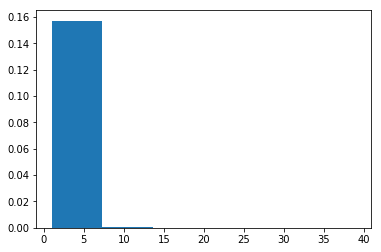

In [125]:
import matplotlib.pyplot as plt
import numpy as np

plot_age = array
plt.hist(plot_age, normed=True, bins=)

plt.show()




# Calculate the similar

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
user_sim = cosine_similarity(pivot.as_matrix())
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [25]:
user_sim.max()

1.0000000000000002

In [26]:
np.fill_diagonal( user_sim, 0)

In [27]:
user_sim.max()

1.0

In [28]:
df_corr = pd.DataFrame(user_sim, columns=pivot.index.values, index=pivot.index)
df_corr

,100085,100522,100622,100683,100684,100806,100822,100843,100862,100982,...,99087,99222,99322,99582,99702,99782,99885,99887,99923,99946
100085,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
100522,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
100622,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
100683,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
100684,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
100806,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
100822,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
100843,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
100862,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
100982,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [29]:
import seaborn as sns
#sns.heatmap(df_corr, annot=True)

# sort correlation

In [30]:
sort_recommend = df_corr.sort_values('99885', ascending=False)
sort_recommend2 = sort_recommend[sort_recommend['99885']>0.3]
sort_recommend2['99885']

105764    0.707107
82567     0.707107
101543    0.707107
202062    0.707107
30503     0.707107
95922     0.707107
151471    0.707107
250323    0.500000
25605     0.500000
4122      0.500000
125562    0.500000
253202    0.471405
115362    0.408248
102044    0.408248
121085    0.408248
21408     0.316228
150742    0.316228
Name: 99885, dtype: float64

# most user

In [31]:
most_user_array = np.array(sort_recommend['99885'], dtype=pd.Series)
most_user_array

array([0.7071067811865475, 0.7071067811865475, 0.7071067811865475, ...,
       0.0, 0.0, 0.0], dtype=object)

In [145]:
pivot.shape

(3455, 2375)

# quantity_array

In [33]:
quantity1 = pivot['19023350'].values
quantity1

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
np.unique(quantity1, axis=0)

array([0, 2, 4])

# predict item

In [39]:
array_q = pivot.values
array_q


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
array_q.shape

(3455, 2375)

In [42]:
for row in array_q:
     sum(row * most_user_array) / sum(most_user_array)
        

ValueError: operands could not be broadcast together with shapes (2375,) (3455,) 

In [43]:
recommend =[]
def predict(quant):
    
    n = len(pivot)
    for i in quant:
        result =  sum(i * most_user_array) / sum(most_user_array)
        return recommend.append(result)
       

In [44]:
predict(quantity1)

In [45]:
recommend

[0.0]

# normalzation

In [166]:
pivot_value = pivot.values
pivot_value.shape

(3455, 2375)

In [167]:
mean = pivot.mean(axis=1).as_matrix()
mean.shape

(3455,)

In [168]:
pivot.std(axis=1).as_matrix()

array([0.02051957, 0.02051957, 0.02901294, ..., 0.0615587 , 0.02901294,
       0.02051957])

In [179]:
def normalization(value):
    mean =pivot.mean(axis=1).as_matrix()
    std = pivot.std(axis=1).as_matrix()
    pivot_value = pivot.values
    
    h = (pivot_value-mean)/std
    r = user_sim*h
  
    
    for corr in user_sim:
        sum_sim = abs(corr)
    
    for i in r:
        rate_nor = mean+(np.sum(i))/(np.sum(sum_sim))
        print (rate_nor)

In [180]:
normalization(pivot_value)

ValueError: operands could not be broadcast together with shapes (3455,2375) (3455,) 